# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

632


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
#Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#lists for holding values
cityname = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
latitude = []
longitude = []
count = 1

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        cityname.append(response['name'])
        temperature.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        print(f"Fetching Record {count} | {city}") 
        count += 1
    except:
        print("city not found")
        continue


Fetching Record 1 | petropavlovsk-kamchatskiy
Fetching Record 2 | new norfolk
Fetching Record 3 | yellowknife
Fetching Record 4 | darnah
Fetching Record 5 | bluff
Fetching Record 6 | cabo san lucas
city not found
Fetching Record 7 | lorengau
city not found
Fetching Record 8 | puerto ayora
Fetching Record 9 | qaanaaq
Fetching Record 10 | provideniya
Fetching Record 11 | clyde river
city not found
Fetching Record 12 | ushuaia
Fetching Record 13 | hobart
Fetching Record 14 | isangel
Fetching Record 15 | sao filipe
Fetching Record 16 | rikitea
Fetching Record 17 | bokoro
Fetching Record 18 | ust-omchug
Fetching Record 19 | thunder bay
Fetching Record 20 | narsaq
Fetching Record 21 | atuona
Fetching Record 22 | hay river
Fetching Record 23 | mataura
Fetching Record 24 | kavaratti
Fetching Record 25 | barcelona
Fetching Record 26 | robertsport
Fetching Record 27 | borkenes
Fetching Record 28 | tupiza
Fetching Record 29 | daokou
city not found
Fetching Record 30 | kirakira
Fetching Record 31 

Fetching Record 254 | kousseri
Fetching Record 255 | manaus
Fetching Record 256 | mudu
Fetching Record 257 | sidi ali
Fetching Record 258 | mogzon
city not found
Fetching Record 259 | dongsheng
Fetching Record 260 | mehamn
Fetching Record 261 | nowa deba
Fetching Record 262 | nantucket
Fetching Record 263 | bobon
Fetching Record 264 | iqaluit
Fetching Record 265 | goderich
Fetching Record 266 | keti bandar
Fetching Record 267 | birjand
Fetching Record 268 | douentza
Fetching Record 269 | kodiak
Fetching Record 270 | mackenzie
Fetching Record 271 | saint george
Fetching Record 272 | rawlins
Fetching Record 273 | yerbogachen
Fetching Record 274 | tamandare
Fetching Record 275 | mehran
Fetching Record 276 | catamarca
Fetching Record 277 | port elizabeth
Fetching Record 278 | evensk
Fetching Record 279 | tongchuan
Fetching Record 280 | belaya gora
Fetching Record 281 | buraydah
Fetching Record 282 | athabasca
Fetching Record 283 | strezhevoy
Fetching Record 284 | metro
Fetching Record 285 

Fetching Record 509 | okhotsk
Fetching Record 510 | batemans bay
Fetching Record 511 | awbari
Fetching Record 512 | santander
Fetching Record 513 | broome
Fetching Record 514 | zeya
Fetching Record 515 | saint anthony
Fetching Record 516 | skelleftea
Fetching Record 517 | ugoofaaru
Fetching Record 518 | qasigiannguit
Fetching Record 519 | celestun
Fetching Record 520 | buala
Fetching Record 521 | falun
Fetching Record 522 | baruta
Fetching Record 523 | chimbote
Fetching Record 524 | abasolo
Fetching Record 525 | obzor
Fetching Record 526 | cortez
Fetching Record 527 | jalu
Fetching Record 528 | kloulklubed
Fetching Record 529 | yerkoy
Fetching Record 530 | nzega
Fetching Record 531 | kamaishi
Fetching Record 532 | bihariganj
Fetching Record 533 | burgeo
Fetching Record 534 | bitkine
Fetching Record 535 | orotukan
Fetching Record 536 | moron
Fetching Record 537 | khani
Fetching Record 538 | seoul
city not found
Fetching Record 539 | waipawa
Fetching Record 540 | salihorsk
Fetching Recor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
weather_city = {
    'City': cityname,
    'Temperature': temperature, 
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': wind_speed,
    'Lat': latitude, 
    'Lng': longitude 
}
weather_data = pd.DataFrame(weather_city)
weather_data.head()


,City,Temperature,Humidity,Cloudiness,Wind Speed,Lat,Lng
0,Petropavlovsk-Kamchatskiy,48.79,100,90,6.71,53.0452,158.6483
1,New Norfolk,55.89,78,86,1.88,-42.7826,147.0587
2,Yellowknife,59.52,67,20,8.05,62.4560,-114.3525
3,Darnah,70.57,79,0,11.88,32.7670,22.6367
4,Bluff,52.74,98,100,8.50,-46.6000,168.3333


In [11]:
#export weather data to csv
weather_data.to_csv("Output/CityWeather1.csv")

## Inspect the data and remove the cities where the humidity > 100%.

Skip this step if there are no cities that have humidity > 100%. 

In [12]:
#  Get the indices of cities that have humidity over 100%.
humidity_check = weather_data.loc[weather_data['Humidity'] > 100]
humidity_check

,City,Temperature,Humidity,Cloudiness,Wind Speed,Lat,Lng


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

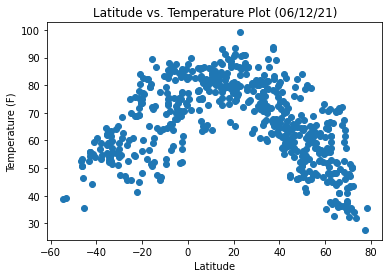

In [16]:
# Create a Scatter Plot for temperature vs latitude
x_values = weather_data['Lat']
y_values = weather_data['Temperature']
plt.scatter(x_values,y_values)
plt.title('Latitude vs. Temperature Plot (06/12/21)')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.savefig('lat_temp.png')
plt.show()
#lower temperatures are found further away from the equator

## Latitude vs. Humidity Plot

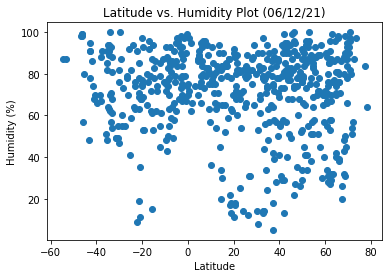

In [17]:
# Create a Scatter Plot for Latitude vs Humidity
x_values = weather_data['Lat']
y_values = weather_data['Humidity']
plt.scatter(x_values,y_values)
plt.title('Latitude vs. Humidity Plot (06/12/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('lat_hum.png')
plt.show()
#humidity is not dependent on latitude

## Latitude vs. Cloudiness Plot

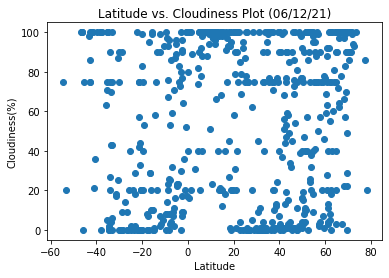

In [18]:
# Create a Scatter Plot for Latitude vs Cloudiness
x_values = weather_data['Lat']
y_values = weather_data['Cloudiness']
plt.scatter(x_values,y_values)
plt.title('Latitude vs. Cloudiness Plot (06/12/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.savefig('lat_cloud.png')
plt.show()
#cloudiness is not dependent on latitude

## Latitude vs. Wind Speed Plot

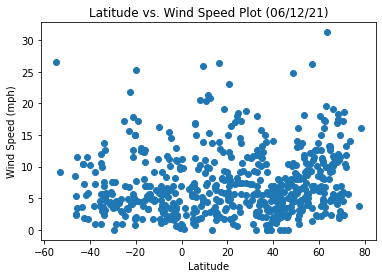

In [19]:
# Create a Scatter Plot for Latitude vs Wind speed
x_values = weather_data['Lat']
y_values = weather_data['Wind Speed']
plt.scatter(x_values,y_values)
plt.title('Latitude vs. Wind Speed Plot (06/12/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('lat_wind.png')
plt.show()
#wind speed is not dependent on latitude

## Linear Regression

In [20]:
NorthernHemisphere = weather_data.loc[weather_data['Lat'] > 0]
SouthernHemisphere = weather_data.loc[weather_data['Lat'] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [21]:
NorthernHemisphere

,City,Temperature,Humidity,Cloudiness,Wind Speed,Lat,Lng
0,Petropavlovsk-Kamchatskiy,48.79,100,90,6.71,53.0452,158.6483
2,Yellowknife,59.52,67,20,8.05,62.4560,-114.3525
3,Darnah,70.57,79,0,11.88,32.7670,22.6367
5,Cabo San Lucas,79.63,68,4,5.68,22.8909,-109.9124
8,Qaanaaq,27.64,84,86,3.83,77.4840,-69.3632
...,...,...,...,...,...,...,...
568,Hacarí,65.48,94,88,1.92,8.3233,-73.1489
570,Moravský Beroun,51.06,76,40,8.99,49.7937,17.4421
572,Bull Savanna,75.54,87,100,7.99,17.8868,-77.5902
573,Udachny,49.77,71,100,11.30,66.4167,112.4000


The r-squared is: 0.5903744796348914


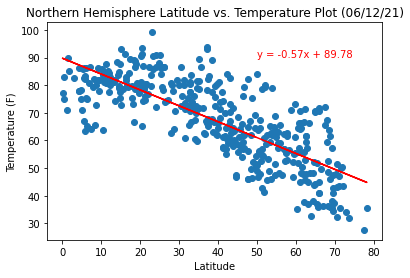

In [23]:
# Create a Scatter Plot for temperature vs latitude for northern hemisphere
x_values = NorthernHemisphere['Lat']
y_values = NorthernHemisphere['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,90),fontsize=10,color="red")
plt.title('Northern Hemisphere Latitude vs. Temperature Plot (06/12/21)')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
print(f"The r-squared is: {rvalue**2}")
plt.show()
# in the northern hemisphere temperature is lower at higher latitudes and is inversely correlated

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [24]:
SouthernHemisphere

,City,Temperature,Humidity,Cloudiness,Wind Speed,Lat,Lng
1,New Norfolk,55.89,78,86,1.88,-42.7826,147.0587
4,Bluff,52.74,98,100,8.50,-46.6000,168.3333
6,Lorengau,85.44,69,9,10.96,-2.0226,147.2712
7,Puerto Ayora,73.54,90,52,10.00,-0.7393,-90.3518
11,Ushuaia,38.86,87,75,26.46,-54.8000,-68.3000
...,...,...,...,...,...,...,...
556,Balikpapan,83.39,79,20,4.61,-1.2675,116.8289
565,Kaeo,63.32,94,100,10.58,-35.1000,173.7833
566,Urbano Santos,70.81,98,30,3.36,-3.2078,-43.4036
569,Pilar,69.73,93,100,1.74,-9.5972,-35.9567


The r-squared is: 0.3740432395958787


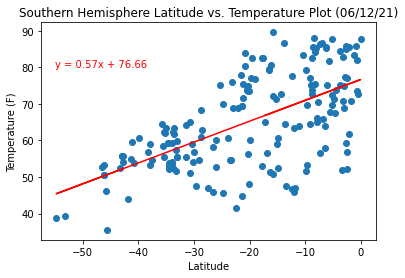

In [25]:
# Create a Scatter Plot for temperature vs latitude for southern hemisphere
x_values = SouthernHemisphere['Lat']
y_values = SouthernHemisphere['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55, 80),fontsize=10,color="red")
plt.title('Southern Hemisphere Latitude vs. Temperature Plot (06/12/21)')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
print(f"The r-squared is: {rvalue**2}")
plt.show()
#in the southern hemisphere temperature increased toward the equator and is positively correlated

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.00041087056478540066


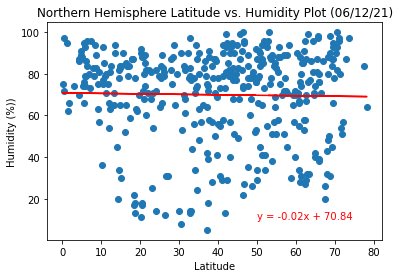

In [32]:
# Create a Scatter Plot for Northern Hemisphere Latitude vs Humidity
x_values = NorthernHemisphere['Lat']
y_values = NorthernHemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,10),fontsize=10,color="red")
plt.title('Northern Hemisphere Latitude vs. Humidity Plot (06/12/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%))')
print(f"The r-squared is: {rvalue**2}")
plt.show()
#there is no apparent correlation between latitude and humidity in the northern hemisphere

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 9.496984413893051e-05


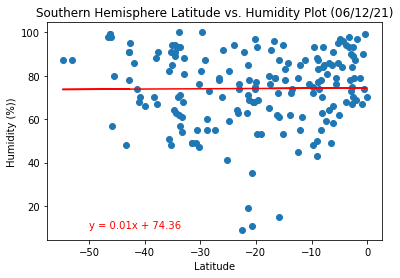

In [27]:
# Create a Scatter Plot for Southern Hemisphere Latitude vs Humidity
x_values = SouthernHemisphere['Lat']
y_values = SouthernHemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=10,color="red")
plt.title('Southern Hemisphere Latitude vs. Humidity Plot (06/12/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%))')
print(f"The r-squared is: {rvalue**2}")
plt.show()
#there is no apparent correlation between latitude and humidity in the southern hemisphere

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.005719273309785567


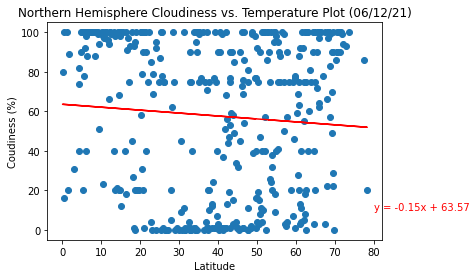

In [28]:
# Create a Scatter Plot for Cloudiness vs latitude for southern hemisphere
x_values = NorthernHemisphere['Lat']
y_values = NorthernHemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(80, 10),fontsize=10,color="red")
plt.title('Northern Hemisphere Cloudiness vs. Temperature Plot (06/12/21)')
plt.xlabel('Latitude')
plt.ylabel('Coudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()
#there is no apparent correlation between latitude and cloudiness in the northern hemisphere

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.013803996238752536


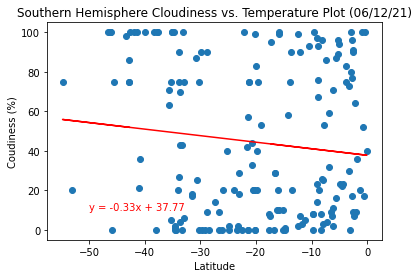

In [33]:
# Create a Scatter Plot for Cloudiness vs latitude for southern hemisphere
x_values = SouthernHemisphere['Lat']
y_values = SouthernHemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50, 10),fontsize=10,color="red")
plt.title('Southern Hemisphere Cloudiness vs. Temperature Plot (06/12/21)')
plt.xlabel('Latitude')
plt.ylabel('Coudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()
#there is no apparent correlation between latitude and cloudiness in the southern hemisphere

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.006885609652464634


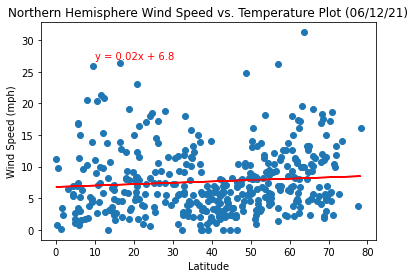

In [30]:
# Create a Scatter Plot for Wind Speed vs latitude for southern hemisphere
x_values = NorthernHemisphere['Lat']
y_values = NorthernHemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10, 27),fontsize=10,color="red")
plt.title('Northern Hemisphere Wind Speed vs. Temperature Plot (06/12/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue**2}")
plt.show()
#there is no apparent correlation between latitude and wind speed in the northern hemisphere

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0075735824217336885


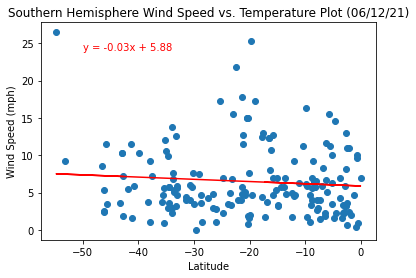

In [31]:
# Create a Scatter Plot for Wind Speed vs latitude for southern hemisphere
x_values = SouthernHemisphere['Lat']
y_values = SouthernHemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50, 24),fontsize=10,color="red")
plt.title('Southern Hemisphere Wind Speed vs. Temperature Plot (06/12/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue**2}")
plt.show()
#there is no apparent correlation between latitude and wind speed in the southern hemisphere